<a href="https://colab.research.google.com/github/amrrmadhn/nexora-pestadatanasional-2025/blob/master/folder-submit/tim_nexora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [ ]:
!pip uninstall pmdarima numpy -y

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install pmdarima

In [ ]:
!pip install darts

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from prophet import Prophet
from darts import TimeSeries
from darts.models import AutoARIMA, ExponentialSmoothing as DartsExponentialSmoothing

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Helper Function

In [ ]:
# Fungsi untuk menghitung SMAPE (Symmetric Mean Absolute Percentage Error)
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def evaluate_model(y_true, y_pred):
    mae_val = mean_absolute_error(y_true, y_pred)
    mse_val = mean_squared_error(y_true, y_pred)
    rmse_val = sqrt(mse_val)
    smape_val = symmetric_mean_absolute_percentage_error(y_true, y_pred)
    return mae_val, rmse_val, smape_val, mse_val

# Import Dataset

In [ ]:
data = pd.read_csv('folder-submit/dataCarSale2021-2025.csv')
df = pd.DataFrame(data)
df.head()

,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2021-01-01,8993.0,7231.0,9108.0,6400.0,15474.0
1,2021-02-01,9412.0,6812.0,7567.0,4600.0,14645.0
2,2021-03-01,16770.0,11350.0,13088.0,8669.0,26034.0
3,2021-04-01,15861.0,8474.0,13820.0,8100.0,22618.0
4,2021-05-01,8310.0,5832.0,10160.0,5341.0,17361.0


In [ ]:
df

,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2021-01-01,8993.000,7231.000,9108.000,6400.000,15474.000
1,2021-02-01,9412.000,6812.000,7567.000,4600.000,14645.000
2,2021-03-01,16770.000,11350.000,13088.000,8669.000,26034.000
3,2021-04-01,15861.000,8474.000,13820.000,8100.000,22618.000
4,2021-05-01,8310.000,5832.000,10160.000,5341.000,17361.000
5,2021-06-01,15481.000,8782.000,8277.000,8965.000,22310.000
6,2021-07-01,9284.000,9030.000,13453.000,6274.000,20950.000
7,2021-08-01,14408.000,7337.000,13720.000,10021.000,28418.000
8,2021-09-01,17529.000,3453.000,12200.000,7515.000,32596.000
9,2021-10-01,17020.000,5861.000,13109.000,7624.000,20633.000


# Data Quality

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waktu       54 non-null     object 
 1   DAIHATSU    54 non-null     float64
 2   HONDA       54 non-null     float64
 3   MITSUBISHI  54 non-null     float64
 4   SUZUKI      54 non-null     float64
 5   TOYOTA      54 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


In [ ]:
df.describe()

,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,11254.531630,7645.139556,8760.141000,5609.579630,19934.127907
std,4597.871605,3886.261244,3351.676613,2351.526395,7855.556087
min,5755.232000,1590.411000,4349.666000,2004.813000,7617.122000
25%,7477.087250,3855.075250,6204.000000,3227.915000,12472.187250
50%,9310.389000,7725.500000,7637.046000,5830.500000,20983.500000
75%,15638.000000,10809.250000,11669.500000,7514.250000,25945.000000
max,23165.000000,15993.000000,18211.000000,10021.000000,33153.000000


## Checking Null

In [ ]:
df.isnull().sum()

,0
waktu,0
DAIHATSU,0
HONDA,0
MITSUBISHI,0
SUZUKI,0
TOYOTA,0


# Data Normalization

In [ ]:
# # daftar kolom brand
# brand_cols = ["DAIHATSU", "HONDA", "MITSUBISHI", "SUZUKI", "TOYOTA"]

# # bulatkan dulu lalu ubah ke integer
# df[brand_cols] = df[brand_cols].astype(int)

# # cek hasilnya
# print(df.dtypes)
# print(df.head())

### Brand Type Normaliazation

In [ ]:
brand_cols = ["DAIHATSU", "HONDA", "MITSUBISHI", "SUZUKI", "TOYOTA"]
df[brand_cols] = df[brand_cols].fillna(0).astype('int64')

df.head()

,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2021-01-01,8993,7231,9108,6400,15474
1,2021-02-01,9412,6812,7567,4600,14645
2,2021-03-01,16770,11350,13088,8669,26034
3,2021-04-01,15861,8474,13820,8100,22618
4,2021-05-01,8310,5832,10160,5341,17361


### Time Normalization

In [ ]:
df["waktu"] = pd.to_datetime(df["waktu"])
df = df.sort_values("waktu").reset_index(drop=True)

df.head()

,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2021-01-01,8993,7231,9108,6400,15474
1,2021-02-01,9412,6812,7567,4600,14645
2,2021-03-01,16770,11350,13088,8669,26034
3,2021-04-01,15861,8474,13820,8100,22618
4,2021-05-01,8310,5832,10160,5341,17361


In [ ]:
df

,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2021-01-01,8993,7231,9108,6400,15474
1,2021-02-01,9412,6812,7567,4600,14645
2,2021-03-01,16770,11350,13088,8669,26034
3,2021-04-01,15861,8474,13820,8100,22618
4,2021-05-01,8310,5832,10160,5341,17361
5,2021-06-01,15481,8782,8277,8965,22310
6,2021-07-01,9284,9030,13453,6274,20950
7,2021-08-01,14408,7337,13720,10021,28418
8,2021-09-01,17529,3453,12200,7515,32596
9,2021-10-01,17020,5861,13109,7624,20633


### Setting Datetime Index dan Frekuensi Bulanan

In [ ]:
df = df.set_index("waktu").asfreq("MS")
df[brand_cols] = df[brand_cols].fillna(0).astype('int64')

# Cek hasil final
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2021-01-01 to 2025-07-01
Freq: MS
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   DAIHATSU    55 non-null     int64
 1   HONDA       55 non-null     int64
 2   MITSUBISHI  55 non-null     int64
 3   SUZUKI      55 non-null     int64
 4   TOYOTA      55 non-null     int64
dtypes: int64(5)
memory usage: 2.6 KB


,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
waktu,,,,,
2021-01-01,8993,7231,9108,6400,15474
2021-02-01,9412,6812,7567,4600,14645
2021-03-01,16770,11350,13088,8669,26034
2021-04-01,15861,8474,13820,8100,22618
2021-05-01,8310,5832,10160,5341,17361


In [ ]:
df

,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
waktu,,,,,
2021-01-01,8993,7231,9108,6400,15474
2021-02-01,9412,6812,7567,4600,14645
2021-03-01,16770,11350,13088,8669,26034
2021-04-01,15861,8474,13820,8100,22618
2021-05-01,8310,5832,10160,5341,17361
2021-06-01,15481,8782,8277,8965,22310
2021-07-01,9284,9030,13453,6274,20950
2021-08-01,14408,7337,13720,10021,28418
2021-09-01,17529,3453,12200,7515,32596




> ada null pada bulan desember 2023, kita ubah menjadi 0, karena tidak relevan
jika kita mengisinya dengan mean atau median mengingat akan sangat berpengaruh pada prediksi akhir



In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2021-01-01 to 2025-07-01
Freq: MS
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   DAIHATSU    55 non-null     int64
 1   HONDA       55 non-null     int64
 2   MITSUBISHI  55 non-null     int64
 3   SUZUKI      55 non-null     int64
 4   TOYOTA      55 non-null     int64
dtypes: int64(5)
memory usage: 2.6 KB


,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,11049.745455,7506.036364,8600.818182,5507.527273,19571.527273
std,4801.371610,3985.844861,3524.388915,2449.435482,8233.741267
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7407.000000,3793.500000,6160.500000,3135.000000,11936.000000
50%,9284.000000,7337.000000,7567.000000,5801.000000,20950.000000
75%,15603.000000,10735.500000,11583.000000,7513.500000,25856.000000
max,23165.000000,15993.000000,18211.000000,10021.000000,33153.000000


# EDA

## Visualisasi Semua Brand

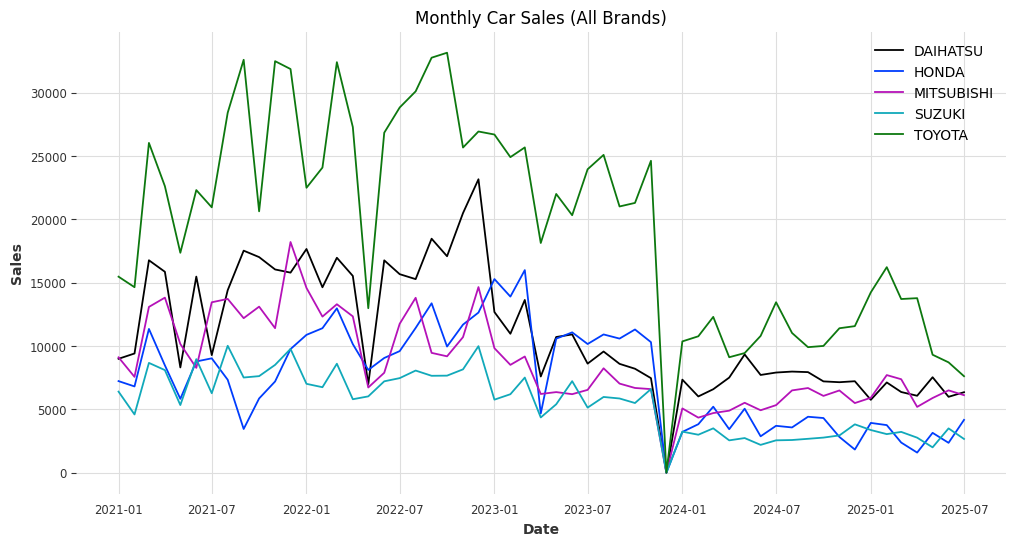

In [ ]:
plt.figure(figsize=(12,6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.title("Monthly Car Sales (All Brands)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

## Visualisasi Masing2 Brand

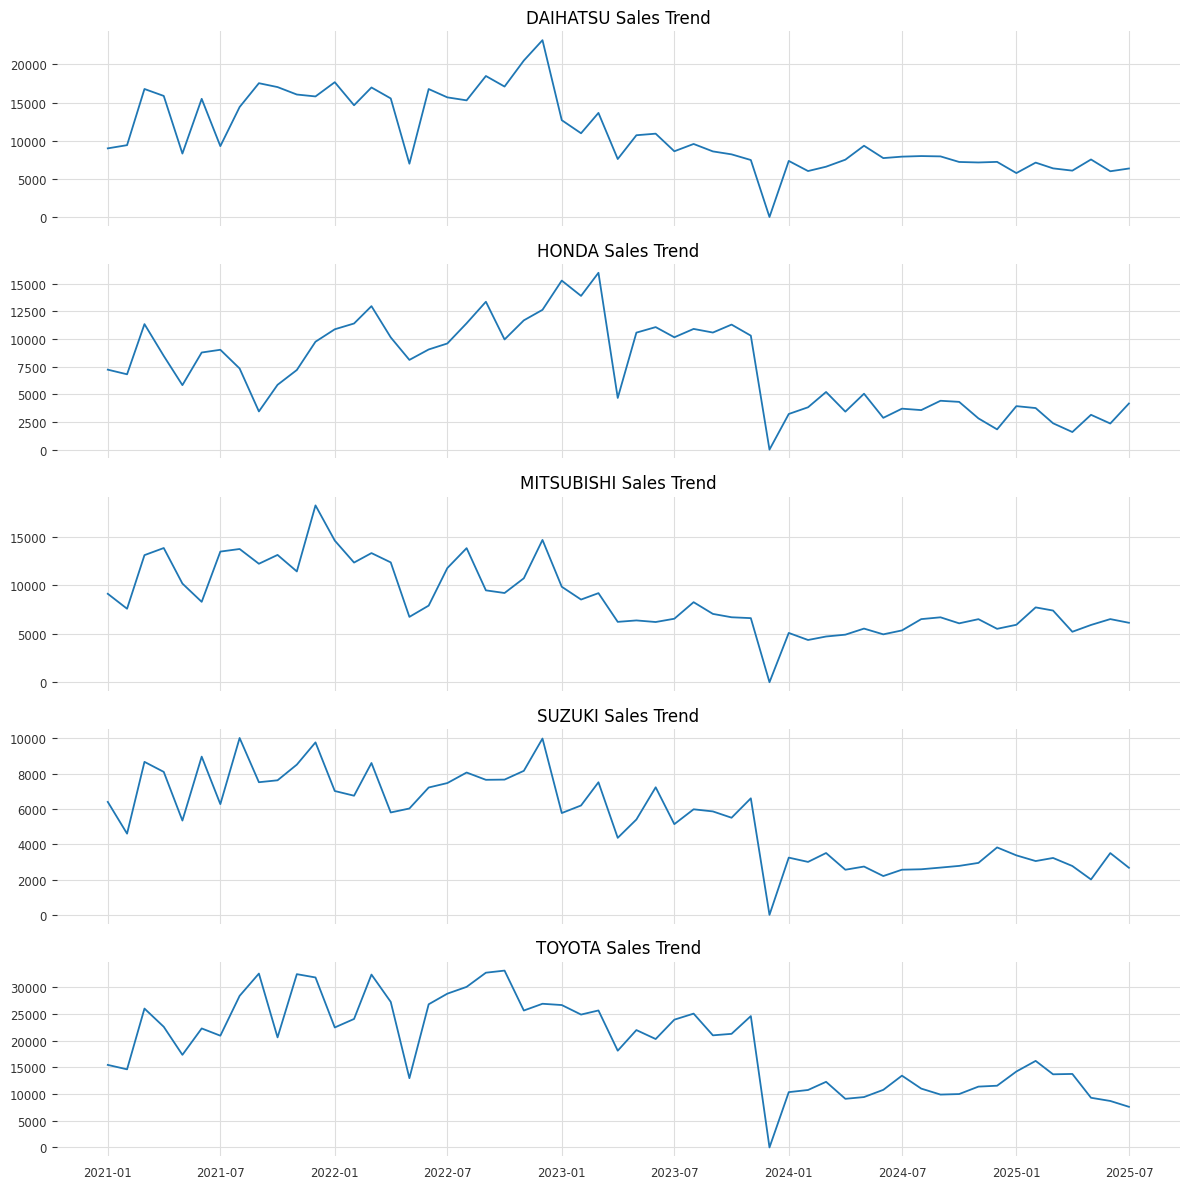

In [ ]:
fig, axes = plt.subplots(len(df.columns), 1, figsize=(12, 12), sharex=True)
for i, col in enumerate(df.columns):
    axes[i].plot(df.index, df[col], label=col, color="tab:blue")
    axes[i].set_title(f"{col} Sales Trend")
    axes[i].grid(True)
plt.tight_layout()
plt.show()

## Corr.

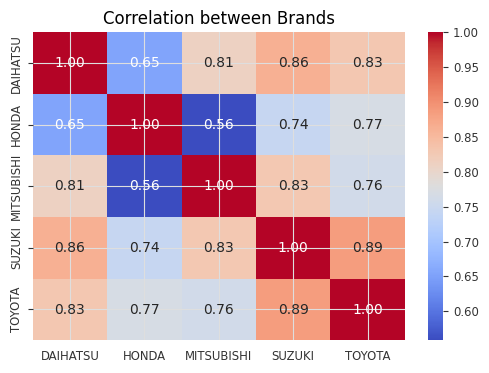

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Brands")
plt.show()

## ADF

In [ ]:
adf_results = {}
for col in df.columns:
    result = adfuller(df[col])
    adf_results[col] = {
        "ADF Statistic": result[0],
        "p-value": result[1],
        "Stationary?": result[1] < 0.05
    }

adf_results

{'DAIHATSU': {'ADF Statistic': -1.416179889493931,
  'p-value': 0.5744951677160777,
  'Stationary?': False},
 'HONDA': {'ADF Statistic': -1.927874462871354,
  'p-value': 0.3190638175719733,
  'Stationary?': False},
 'MITSUBISHI': {'ADF Statistic': -1.4421695406999915,
  'p-value': 0.5619010009766512,
  'Stationary?': False},
 'SUZUKI': {'ADF Statistic': -0.7655158867472286,
  'p-value': 0.8290422899064709,
  'Stationary?': False},
 'TOYOTA': {'ADF Statistic': -0.9025024887879051,
  'p-value': 0.7871471950943145,
  'Stationary?': False}}

In [ ]:
df.head()

,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
waktu,,,,,
2021-01-01,8993,7231,9108,6400,15474
2021-02-01,9412,6812,7567,4600,14645
2021-03-01,16770,11350,13088,8669,26034
2021-04-01,15861,8474,13820,8100,22618
2021-05-01,8310,5832,10160,5341,17361


# Data Splitting

In [ ]:
# Split train-test (80% data awal untuk train, 20% sisa untuk test)
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

brands = df.columns.tolist()

print("\nPembagian data selesai:")
print(f"Bentuk data Train : {train.shape}")
print(f"Bentuk data Test  : {test.shape}")
print("-" * 30)
print(f"Periode Train     : {train.index.min().date()} sampai {train.index.max().date()}")
print(f"Periode Test      : {test.index.min().date()} sampai {test.index.max().date()}")


Pembagian data selesai:
Bentuk data Train : (44, 5)
Bentuk data Test  : (11, 5)
------------------------------
Periode Train     : 2021-01-01 sampai 2024-08-01
Periode Test      : 2024-09-01 sampai 2025-07-01


# Dictionary

In [ ]:
results = {brand: {} for brand in brand_cols}

# Modelling

## Auto ARIMA

In [ ]:
print("\n### Auto ARIMA Modeling")
for brand in brand_cols:
    print(f"\nModeling Auto ARIMA untuk {brand}")
    train_series = train[brand]
    test_series = test[brand]
    try:
        auto_model = auto_arima(train_series, seasonal=True, m=12, trace=False, suppress_warnings=True)
        auto_pred = auto_model.predict(n_periods=len(test_series))
        mae, rmse, smape, mse = evaluate_model(test_series, auto_pred)
        results[brand]['AutoARIMA'] = {'MAE': mae, 'RMSE': rmse, 'SMAPE': smape, 'MSE': mse, 'model': auto_model}
        print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, SMAPE: {smape:.2f}%, MSE: {mse:.2f}")
    except Exception as e:
        print(f"Gagal: {e}")


### Auto ARIMA Modeling

Modeling Auto ARIMA untuk DAIHATSU


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

MAE: 1013.80, RMSE: 1174.85, SMAPE: 14.36%, MSE: 1380266.91

Modeling Auto ARIMA untuk HONDA


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

MAE: 4425.41, RMSE: 4716.65, SMAPE: 83.25%, MSE: 22246820.63

Modeling Auto ARIMA untuk MITSUBISHI


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

MAE: 1345.53, RMSE: 1808.08, SMAPE: 26.72%, MSE: 3269157.77

Modeling Auto ARIMA untuk SUZUKI


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

MAE: 571.79, RMSE: 670.86, SMAPE: 20.19%, MSE: 450046.98

Modeling Auto ARIMA untuk TOYOTA


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

MAE: 2183.71, RMSE: 2563.84, SMAPE: 19.09%, MSE: 6573275.24


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## SARIMAX

### Order SARIMA

In [ ]:
best_orders = {}

In [ ]:
for brand in brand_cols:
    print("\n" + "="*60)
    print(f"Mencari order SARIMA terbaik untuk merek: {brand.upper()}")
    print("="*60)

    train_series = train[brand]

    auto_sarima_model = auto_arima(train_series,
                                     start_p=1, start_q=1,
                                     test='adf',
                                     max_p=3, max_q=3,
                                     m=12,
                                     d=None,
                                     seasonal=True,
                                     start_P=0,
                                     D=None,
                                     trace=True,
                                     error_action='ignore',
                                     suppress_warnings=True,
                                     stepwise=True)

    print("\n" + "-"*30 + f" Hasil untuk {brand.upper()} " + "-"*30)
    print(auto_sarima_model.summary())

    print(f"Order ARIMA terbaik yang ditemukan: {auto_sarima_model.order}")
    print(f"Order Musiman terbaik yang ditemukan: {auto_sarima_model.seasonal_order}")

    # Menyimpan order terbaik untuk digunakan di langkah selanjutnya
    best_orders[brand] = {
        'order': auto_sarima_model.order,
        'seasonal_order': auto_sarima_model.seasonal_order
    }
    print("-" * (75 + len(brand)))


Mencari order SARIMA terbaik untuk merek: DAIHATSU
Performing stepwise search to minimize aic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=841.326, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=843.201, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=839.415, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=839.533, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=841.214, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=837.452, Time=0.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=839.391, Time=0.06 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=837.463, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=839.432, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=837.741, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=837.366, Time=0.06 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=839.355, Time=0.14 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=839.319, Time=0.12 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=838.973, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=838.690, Time=0.08 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=838.906, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=840.689, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12]             : AIC=835.126, Time=0.06 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=837.109, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[12]             : AIC=837.082, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=836.451, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=835.920, Time=0.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[12]             : AIC=836.159, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[12]             : AIC=836.605, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=835.435, Time=0.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[12]             : AIC=836.232, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[12]             : AIC=838.602, Time=0.09 sec

Best model:  ARIMA(2,1,1)(0,0,0)[12]          
Total fit time: 3.278 seconds

------------------------------ Hasil untuk DAIHATSU ------------------------------
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -413.563
Date:                Sat, 06 Sep 2025   AIC                            835.126
Time:                        04:32:05   BIC                            842.171
Sample:                    01-01-2021   HQIC                           837.724
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
            

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=818.189, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=818.733, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=817.614, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=816.632, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=816.776, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=815.513, Time=0.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=816.836, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=817.923, Time=0.16 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=816.005, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=817.299, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=816.290, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=819.286, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=813.126, Time=0.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12]             : AIC=814.474, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=814.407, Time=0.05 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=815.966, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=814.064, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=814.453, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=814.303, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=816.035, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 1.304 seconds

------------------------------ Hasil untuk HONDA ------------------------------
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -404.563
Date:                Sat, 06 Sep 2025   AIC                            813.126
Time:                        04:32:06   BIC                            816.648
Sample:                    01-01-2021   HQIC                           814.425
                         - 08-01-2024

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=810.184, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=810.554, Time=0.05 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=806.494, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=808.215, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=806.821, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.40 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=810.281, Time=0.06 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.15 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=808.229, Time=0.23 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.29 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.81 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12]             : AIC=inf, Time=0.82 sec

Best model:  ARIMA(0,1,1)(0,0,1)[12] intercept
Total fit time: 5.983 seconds

------------------------------ Hasil untuk MITSUBISHI ------------------------------
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   44
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -399.247
Date:                            Sat, 06 Sep 2025   AIC                            806.494
Time:                                    04:32:12   BIC                            813.539
Sample:                                01-01-2021   HQIC                           809.092
                                     - 08-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z   

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=770.498, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=784.286, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=771.963, Time=0.10 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=770.131, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=782.369, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=768.253, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=770.195, Time=0.18 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=768.813, Time=0.09 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=768.415, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=770.246, Time=0.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=770.387, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=766.626, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=768.538, Time=0.12 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12]             : AIC=768.620, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=766.992, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=766.554, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12]             : AIC=768.439, Time=0.15 sec
 ARIMA(0,1,2)(0,0,1)[12]             : AIC=768.322, Time=0.14 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=768.516, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[12]             : AIC=768.754, Time=0.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[12]             : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,1,2)(0,0,0)[12]          
Total fit time: 3.892 seconds

------------------------------ Hasil untuk SUZUKI ------------------------------
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -380.277
Date:                Sat, 06 Sep 2025   AIC                            766.554
Time:                        04:32:16   BIC                            771.838
Sample:                    01-01-2021   HQIC                           768.503
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=884.202, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=886.629, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=884.520, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=882.231, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=884.650, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=880.642, Time=0.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=882.477, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=882.668, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=883.231, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=882.662, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=883.922, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=877.453, Time=0.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12]             : AIC=879.181, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=879.145, Time=0.05 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=879.416, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=879.408, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=880.651, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=881.117, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 1.402 seconds

------------------------------ Hasil untuk TOYOTA ------------------------------
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -436.727
Date:                Sat, 06 Sep 2025   AIC                            877.453
Time:                        04:32:17   BIC                            880.976
Sample:                    01-01-2021   HQIC                           878.752
                         - 08-01-2024   

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### SARIMAX Modelling

In [ ]:
print("SARIMAX Modeling Menggunakan Order Terbaik")

for brand in brand_cols:
    print(f"\nModeling SARIMAX untuk {brand.upper()}")
    train_series = train[brand]
    test_series = test[brand]
    results[brand] = {}

    # Mengambil order terbaik yang sudah ditemukan di langkah sebelumnya
    order = best_orders[brand]['order']
    seasonal_order = best_orders[brand]['seasonal_order']
    print(f"Menggunakan Order: {order} dan Seasonal Order: {seasonal_order}")

    try:
        # Melatih model SARIMAX dengan order yang ditemukan
        sarimax_model = SARIMAX(train_series, order=order, seasonal_order=seasonal_order)
        sarimax_fit = sarimax_model.fit(disp=False)
        sarimax_pred = sarimax_fit.get_forecast(steps=len(test_series)).predicted_mean

        # Mengevaluasi model
        mae, rmse, smape_val, mse = evaluate_model(test_series.values, sarimax_pred.values)

        results[brand]['SARIMAX'] = {'MAE': mae, 'RMSE': rmse, 'SMAPE': smape_val, 'MSE': mse, 'model': sarimax_fit}
        print(f"Hasil Evaluasi - MAE: {mae:.2f}, RMSE: {rmse:.2f}, SMAPE: {smape_val:.2f}%, MSE: {mse:.2f}")

    except Exception as e:
        print(f"Gagal saat modeling untuk {brand}: {e}")

SARIMAX Modeling Menggunakan Order Terbaik

Modeling SARIMAX untuk DAIHATSU
Menggunakan Order: (2, 1, 1) dan Seasonal Order: (0, 0, 0, 12)
Hasil Evaluasi - MAE: 1013.80, RMSE: 1174.85, SMAPE: 14.36%, MSE: 1380266.91

Modeling SARIMAX untuk HONDA
Menggunakan Order: (0, 1, 1) dan Seasonal Order: (0, 0, 0, 12)
Hasil Evaluasi - MAE: 915.63, RMSE: 1076.58, SMAPE: 29.91%, MSE: 1159020.26

Modeling SARIMAX untuk MITSUBISHI
Menggunakan Order: (0, 1, 1) dan Seasonal Order: (0, 0, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Hasil Evaluasi - MAE: 1656.20, RMSE: 2132.61, SMAPE: 33.91%, MSE: 4548021.04

Modeling SARIMAX untuk SUZUKI
Menggunakan Order: (0, 1, 2) dan Seasonal Order: (0, 0, 0, 12)
Hasil Evaluasi - MAE: 571.79, RMSE: 670.86, SMAPE: 20.19%, MSE: 450046.98

Modeling SARIMAX untuk TOYOTA
Menggunakan Order: (0, 1, 1) dan Seasonal Order: (0, 0, 0, 12)
Hasil Evaluasi - MAE: 2183.71, RMSE: 2563.84, SMAPE: 19.09%, MSE: 6573275.24


## Prophet

In [ ]:
df.head()

In [ ]:
print("Prophet Modeling")
for brand in brand_cols:
    print(f"\nModeling Prophet untuk {brand}")
    train_series = train[brand]
    test_series = test[brand]
    try:
        prophet_df = pd.DataFrame({'ds': train_series.index, 'y': train_series.values})
        prophet_model = Prophet(yearly_seasonality=True)
        prophet_model.fit(prophet_df)
        future = prophet_model.make_future_dataframe(periods=len(test_series), freq='MS')
        prophet_forecast = prophet_model.predict(future)
        prophet_pred = prophet_forecast['yhat'][-len(test_series):]
        mae, rmse, smape_val, mse = evaluate_model(test_series.values, prophet_pred.values)
        results[brand]['Prophet'] = {'MAE': mae, 'RMSE': rmse, 'SMAPE': smape_val, 'MSE': mse, 'model': prophet_model}
        print(f"Hasil Evaluasi - MAE: {mae:.2f}, RMSE: {rmse:.2f}, SMAPE: {smape_val:.2f}%, MSE: {mse:.2f}")
    except Exception as e:
        print(f"Gagal saat modeling untuk {brand}: {e}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppswxgaq7/czva13nj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppswxgaq7/yrmmn10k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92732', 'data', 'file=/tmp/tmppswxgaq7/czva13nj.json', 'init=/tmp/tmppswxgaq7/yrmmn10k.json', 'output', 'file=/tmp/tmppswxgaq7/prophet_model930brnht/prophet_model-20250906043542.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:35:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Prophet Modeling

Modeling Prophet untuk DAIHATSU


04:35:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppswxgaq7/c9ca5lm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppswxgaq7/uvcqc5nb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34877', 'data', 'file=/tmp/tmppswxgaq7/c9ca5lm_.json', 'init=/tmp/tmppswxgaq7/uvcqc5nb.json', 'output', 'file=/tmp/tmppswxgaq7/prophet_modelqss_bhrw/prophet_model-20250906043542.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:35:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hasil Evaluasi - MAE: 2489.08, RMSE: 3451.32, SMAPE: 40.88%, MSE: 11911580.59

Modeling Prophet untuk HONDA


04:35:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppswxgaq7/7uvo0enp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppswxgaq7/pie40vcp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57631', 'data', 'file=/tmp/tmppswxgaq7/7uvo0enp.json', 'init=/tmp/tmppswxgaq7/pie40vcp.json', 'output', 'file=/tmp/tmppswxgaq7/prophet_model3zsgy7m2/prophet_model-20250906043543.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:35:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hasil Evaluasi - MAE: 3694.85, RMSE: 4557.77, SMAPE: 71.23%, MSE: 20773308.35

Modeling Prophet untuk MITSUBISHI


04:35:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppswxgaq7/9zrdw5y0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppswxgaq7/40l08esp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40592', 'data', 'file=/tmp/tmppswxgaq7/9zrdw5y0.json', 'init=/tmp/tmppswxgaq7/40l08esp.json', 'output', 'file=/tmp/tmppswxgaq7/prophet_modelqiuaav4g/prophet_model-20250906043543.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:35:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:35:43 - cmdstanpy - INFO - Chain [1]

Hasil Evaluasi - MAE: 5506.77, RMSE: 5938.66, SMAPE: 126.54%, MSE: 35267713.94

Modeling Prophet untuk SUZUKI


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppswxgaq7/zltc1wis.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppswxgaq7/zpgdbapc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87950', 'data', 'file=/tmp/tmppswxgaq7/zltc1wis.json', 'init=/tmp/tmppswxgaq7/zpgdbapc.json', 'output', 'file=/tmp/tmppswxgaq7/prophet_modelcfijxmyu/prophet_model-20250906043543.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:35:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hasil Evaluasi - MAE: 1712.12, RMSE: 2225.60, SMAPE: 70.49%, MSE: 4953304.69

Modeling Prophet untuk TOYOTA


04:35:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hasil Evaluasi - MAE: 7018.14, RMSE: 9327.16, SMAPE: 53.79%, MSE: 86995836.97


In [ ]:

print("\nPerbandingan Hasil Prophet untuk Semua Merek\n")

prophet_results_list = []
for brand in brand_cols:
    if 'Prophet' in results.get(brand, {}):
        res = results[brand]['Prophet']
        prophet_results_list.append({
            'Merek': brand,
            'MAE': f"{res['MAE']:.2f}",
            'RMSE': f"{res['RMSE']:.2f}",
            'SMAPE (%)': f"{res['SMAPE']:.2f}",
            'MSE': f"{res['MSE']:.2f}"
        })

if prophet_results_list:
    comparison_df = pd.DataFrame(prophet_results_list)
    print(comparison_df.to_string(index=False))
else:
    print("Tidak ada hasil Prophet yang tersedia untuk dibandingkan.")


Perbandingan Hasil Prophet untuk Semua Merek

     Merek     MAE    RMSE SMAPE (%)         MSE
  DAIHATSU 2489.08 3451.32     40.88 11911580.59
     HONDA 3694.85 4557.77     71.23 20773308.35
MITSUBISHI 5506.77 5938.66    126.54 35267713.94
    SUZUKI 1712.12 2225.60     70.49  4953304.69
    TOYOTA 7018.14 9327.16     53.79 86995836.97


## Holt-Winters

In [ ]:
df.head()

,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
waktu,,,,,
2021-01-01,8993,7231,9108,6400,15474
2021-02-01,9412,6812,7567,4600,14645
2021-03-01,16770,11350,13088,8669,26034
2021-04-01,15861,8474,13820,8100,22618
2021-05-01,8310,5832,10160,5341,17361


In [ ]:
print("\n### Holt-Winters Modeling")
for brand in brand_cols:
    print(f"\nModeling Holt-Winters untuk {brand}")
    train_series = train[brand]
    test_series = test[brand]
    try:
        holt_model = ExponentialSmoothing(train_series, seasonal='add', seasonal_periods=12)
        holt_fit = holt_model.fit()
        holt_pred = holt_fit.forecast(len(test_series))
        mae, rmse, smape, mse = evaluate_model(test_series, holt_pred)
        results[brand]['HoltWinters'] = {'MAE': mae, 'RMSE': rmse, 'SMAPE': smape, 'MSE': mse, 'model': holt_fit}
        print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, SMAPE: {smape:.2f}%, MSE: {mse:.2f}")
    except Exception as e:
        print(f"Gagal: {e}")


### Holt-Winters Modeling

Modeling Holt-Winters untuk DAIHATSU
MAE: 2479.57, RMSE: 2719.34, SMAPE: 31.02%, MSE: 7394787.97

Modeling Holt-Winters untuk HONDA
MAE: 1373.36, RMSE: 1880.80, SMAPE: 36.40%, MSE: 3537411.90

Modeling Holt-Winters untuk MITSUBISHI
MAE: 1528.33, RMSE: 1885.30, SMAPE: 27.88%, MSE: 3554355.20

Modeling Holt-Winters untuk SUZUKI
MAE: 744.53, RMSE: 892.11, SMAPE: 29.49%, MSE: 795868.19

Modeling Holt-Winters untuk TOYOTA
MAE: 4233.29, RMSE: 4824.54, SMAPE: 38.12%, MSE: 23276216.34


### Holt-Winters Comparison

In [ ]:

print("\nPerbandingan Hasil Holt-Winters untuk Semua Merek\n")

holt_results_list = []
for brand in brand_cols:
    if 'HoltWinters' in results.get(brand, {}):
        res = results[brand]['HoltWinters']
        holt_results_list.append({
            'Merek': brand,
            'MAE': f"{res['MAE']:.2f}",
            'RMSE': f"{res['RMSE']:.2f}",
            'SMAPE (%)': f"{res['SMAPE']:.2f}",
            'MSE': f"{res['MSE']:.2f}"
        })

if holt_results_list:
    comparison_df_holt = pd.DataFrame(holt_results_list)
    print(comparison_df_holt.to_string(index=False))
else:
    print("Tidak ada hasil Holt-Winters yang tersedia untuk dibandingkan.")


Perbandingan Hasil Holt-Winters untuk Semua Merek

     Merek     MAE    RMSE SMAPE (%)         MSE
  DAIHATSU 2479.57 2719.34     31.02  7394787.97
     HONDA 1373.36 1880.80     36.40  3537411.90
MITSUBISHI 1528.33 1885.30     27.88  3554355.20
    SUZUKI  744.53  892.11     29.49   795868.19
    TOYOTA 4233.29 4824.54     38.12 23276216.34


## DARTS

In [ ]:
print("\n### DARTS Modeling")
for brand in brand_cols:
    print(f"\nModeling DARTS untuk {brand}")
    train_series = train[brand]
    test_series = test[brand]
    try:
        darts_series = TimeSeries.from_series(train_series)
        darts_auto_model = AutoARIMA()
        darts_auto_model.fit(darts_series)
        darts_auto_pred = darts_auto_model.predict(len(test_series)).values().flatten()
        mae, rmse, smape, mse = evaluate_model(test_series.values, darts_auto_pred)
        results[brand]['Darts_AutoARIMA'] = {'MAE': mae, 'RMSE': rmse, 'SMAPE': smape, 'MSE': mse, 'model': darts_auto_model}
        print(f"Darts AutoARIMA - MAE: {mae:.2f}, RMSE: {rmse:.2f}, SMAPE: {smape:.2f}%, MSE: {mse:.2f}")

        darts_holt_model = DartsExponentialSmoothing(seasonal_periods=12)
        darts_holt_model.fit(darts_series)
        darts_holt_pred = darts_holt_model.predict(len(test_series)).values().flatten()
        mae, rmse, smape, mse = evaluate_model(test_series.values, darts_holt_pred)
        results[brand]['Darts_Holt'] = {'MAE': mae, 'RMSE': rmse, 'SMAPE': smape, 'MSE': mse, 'model': darts_holt_model}
        print(f"Darts Holt - MAE: {mae:.2f}, RMSE: {rmse:.2f}, SMAPE: {smape:.2f}%, MSE: {mse:.2f}")
    except Exception as e:
        print(f"Gagal: {e}")


### DARTS Modeling

Modeling DARTS untuk DAIHATSU
Darts AutoARIMA - MAE: 1126.94, RMSE: 1311.70, SMAPE: 15.78%, MSE: 1720556.86
Darts Holt - MAE: 2138.92, RMSE: 2383.80, SMAPE: 28.35%, MSE: 5682520.44

Modeling DARTS untuk HONDA
Darts AutoARIMA - MAE: 919.24, RMSE: 1093.91, SMAPE: 29.98%, MSE: 1196636.72
Darts Holt - MAE: 2372.91, RMSE: 2761.78, SMAPE: 104.99%, MSE: 7627427.20

Modeling DARTS untuk MITSUBISHI
Darts AutoARIMA - MAE: 764.48, RMSE: 965.70, SMAPE: 12.28%, MSE: 932582.98
Darts Holt - MAE: 2472.47, RMSE: 2877.60, SMAPE: 51.83%, MSE: 8280579.86

Modeling DARTS untuk SUZUKI
Darts AutoARIMA - MAE: 438.79, RMSE: 567.62, SMAPE: 15.09%, MSE: 322192.42
Darts Holt - MAE: 3075.22, RMSE: 3377.69, SMAPE: 144.95%, MSE: 11408804.84

Modeling DARTS untuk TOYOTA
Darts AutoARIMA - MAE: 2179.62, RMSE: 2564.85, SMAPE: 19.06%, MSE: 6578450.30
Darts Holt - MAE: 8227.15, RMSE: 9586.70, SMAPE: 118.01%, MSE: 91904781.97


In [ ]:
print("DARTS Modeling")

for brand in brand_cols:
    print(f"\nModeling DARTS untuk {brand}")
    train_series = train[brand]
    test_series = test[brand]
    try:
        # Konversi ke format Darts TimeSeries
        darts_series = TimeSeries.from_series(train_series)

        # Darts AutoARIMA
        darts_auto_model = AutoARIMA()
        darts_auto_model.fit(darts_series)
        darts_auto_pred = darts_auto_model.predict(len(test_series)).values().flatten()
        mae_auto, rmse_auto, smape_auto, mse_auto = evaluate_model(test_series.values, darts_auto_pred)
        results[brand]['Darts_AutoARIMA'] = {'MAE': mae_auto, 'RMSE': rmse_auto, 'SMAPE': smape_auto, 'MSE': mse_auto, 'model': darts_auto_model}
        print(f"Hasil Darts AutoARIMA - MAE: {mae_auto:.2f}, RMSE: {rmse_auto:.2f}, SMAPE: {smape_auto:.2f}%, MSE: {mse_auto:.2f}")

        # Darts Exponential Smoothing (Holt-Winters)
        darts_holt_model = DartsExponentialSmoothing(seasonal_periods=12)
        darts_holt_model.fit(darts_series)
        darts_holt_pred = darts_holt_model.predict(len(test_series)).values().flatten()
        mae_holt, rmse_holt, smape_holt, mse_holt = evaluate_model(test_series.values, darts_holt_pred)
        results[brand]['Darts_Holt'] = {'MAE': mae_holt, 'RMSE': rmse_holt, 'SMAPE': smape_holt, 'MSE': mse_holt, 'model': darts_holt_model}
        print(f"Hasil Darts Holt-Winters - MAE: {mae_holt:.2f}, RMSE: {rmse_holt:.2f}, SMAPE: {smape_holt:.2f}%, MSE: {mse_holt:.2f}")

    except Exception as e:
        print(f"Gagal saat modeling untuk {brand}: {e}")

DARTS Modeling

Modeling DARTS untuk DAIHATSU
Hasil Darts AutoARIMA - MAE: 1126.94, RMSE: 1311.70, SMAPE: 15.78%, MSE: 1720556.86
Hasil Darts Holt-Winters - MAE: 2138.92, RMSE: 2383.80, SMAPE: 28.35%, MSE: 5682520.44

Modeling DARTS untuk HONDA
Hasil Darts AutoARIMA - MAE: 919.24, RMSE: 1093.91, SMAPE: 29.98%, MSE: 1196636.72
Hasil Darts Holt-Winters - MAE: 2372.91, RMSE: 2761.78, SMAPE: 104.99%, MSE: 7627427.20

Modeling DARTS untuk MITSUBISHI
Hasil Darts AutoARIMA - MAE: 764.48, RMSE: 965.70, SMAPE: 12.28%, MSE: 932582.98
Hasil Darts Holt-Winters - MAE: 2472.47, RMSE: 2877.60, SMAPE: 51.83%, MSE: 8280579.86

Modeling DARTS untuk SUZUKI
Hasil Darts AutoARIMA - MAE: 438.79, RMSE: 567.62, SMAPE: 15.09%, MSE: 322192.42
Hasil Darts Holt-Winters - MAE: 3075.22, RMSE: 3377.69, SMAPE: 144.95%, MSE: 11408804.84

Modeling DARTS untuk TOYOTA
Hasil Darts AutoARIMA - MAE: 2179.62, RMSE: 2564.85, SMAPE: 19.06%, MSE: 6578450.30
Hasil Darts Holt-Winters - MAE: 8227.15, RMSE: 9586.70, SMAPE: 118.01%,

### Darts Comparison

In [ ]:
print("Perbandingan Hasil DARTS untuk Semua Merek")

darts_results_list = []
for brand in brand_cols:
    # Cek dan tambahkan hasil Darts_AutoARIMA
    if 'Darts_AutoARIMA' in results.get(brand, {}):
        res = results[brand]['Darts_AutoARIMA']
        darts_results_list.append({
            'Model': 'Darts_AutoARIMA',
            'Merek': brand,
            'MAE': f"{res['MAE']:.2f}",
            'RMSE': f"{res['RMSE']:.2f}",
            'SMAPE (%)': f"{res['SMAPE']:.2f}",
            'MSE': f"{res['MSE']:.2f}"
        })
    # Cek dan tambahkan hasil Darts_Holt
    if 'Darts_Holt' in results.get(brand, {}):
        res = results[brand]['Darts_Holt']
        darts_results_list.append({
            'Model': 'Darts_Holt',
            'Merek': brand,
            'MAE': f"{res['MAE']:.2f}",
            'RMSE': f"{res['RMSE']:.2f}",
            'SMAPE (%)': f"{res['SMAPE']:.2f}",
            'MSE': f"{res['MSE']:.2f}"
        })

if darts_results_list:
    comparison_df_darts = pd.DataFrame(darts_results_list)
    print(comparison_df_darts.to_string(index=False))
else:
    print("Tidak ada hasil DARTS yang tersedia untuk dibandingkan.")

Perbandingan Hasil DARTS untuk Semua Merek
          Model      Merek     MAE    RMSE SMAPE (%)         MSE
Darts_AutoARIMA   DAIHATSU 1126.94 1311.70     15.78  1720556.86
     Darts_Holt   DAIHATSU 2138.92 2383.80     28.35  5682520.44
Darts_AutoARIMA      HONDA  919.24 1093.91     29.98  1196636.72
     Darts_Holt      HONDA 2372.91 2761.78    104.99  7627427.20
Darts_AutoARIMA MITSUBISHI  764.48  965.70     12.28   932582.98
     Darts_Holt MITSUBISHI 2472.47 2877.60     51.83  8280579.86
Darts_AutoARIMA     SUZUKI  438.79  567.62     15.09   322192.42
     Darts_Holt     SUZUKI 3075.22 3377.69    144.95 11408804.84
Darts_AutoARIMA     TOYOTA 2179.62 2564.85     19.06  6578450.30
     Darts_Holt     TOYOTA 8227.15 9586.70    118.01 91904781.97


# Choosing Best Model

## MAE

In [ ]:
print("Pemilihan Model Terbaik\n")
best_models = {}
for brand in brand_cols:
    if results[brand]:
        best_model_name = min(results[brand], key=lambda x: results[brand][x]['MAE'])
        best_models[brand] = {'name': best_model_name, 'model': results[brand][best_model_name]['model']}
        print(f"Model terbaik untuk {brand}: {best_model_name} dengan MAE {results[brand][best_model_name]['MAE']:.2f}")

Pemilihan Model Terbaik

Model terbaik untuk DAIHATSU: SARIMAX dengan MAE 1013.80
Model terbaik untuk HONDA: SARIMAX dengan MAE 915.63
Model terbaik untuk MITSUBISHI: Darts_AutoARIMA dengan MAE 764.48
Model terbaik untuk SUZUKI: Darts_AutoARIMA dengan MAE 438.79
Model terbaik untuk TOYOTA: Darts_AutoARIMA dengan MAE 2179.62


## SMAPE

In [ ]:
print("Pemilihan Model Terbaik (berdasarkan SMAPE)\n")

best_models = {}
for brand in brand_cols:
    if brand in results and results[brand]:
        # Mengubah kunci pemilihan model menjadi SMAPE
        best_model_name = min(results[brand], key=lambda x: results[brand][x]['SMAPE'])
        best_model_results = results[brand][best_model_name]
        best_models[brand] = {'name': best_model_name, 'model': best_model_results['model']}
        # Memperbarui teks output untuk menyorot SMAPE
        print(f"Model terbaik untuk {brand}: {best_model_name} dengan SMAPE {best_model_results['SMAPE']:.2f}%")
    else:
        print(f"Tidak ada hasil model yang tersedia untuk {brand}")

Pemilihan Model Terbaik (berdasarkan SMAPE)

Model terbaik untuk DAIHATSU: SARIMAX dengan SMAPE 14.36%
Model terbaik untuk HONDA: SARIMAX dengan SMAPE 29.91%
Model terbaik untuk MITSUBISHI: Darts_AutoARIMA dengan SMAPE 12.28%
Model terbaik untuk SUZUKI: Darts_AutoARIMA dengan SMAPE 15.09%
Model terbaik untuk TOYOTA: Darts_AutoARIMA dengan SMAPE 19.06%


## MAE SMAPE

In [ ]:
print("Pemilihan Model Terbaik \n")

best_models = {}
for brand in brand_cols:
    if brand in results and results[brand]:
        best_model_name = min(results[brand], key=lambda x: results[brand][x]['MAE'])
        best_model_results = results[brand][best_model_name]
        best_models[brand] = {'name': best_model_name, 'model': best_model_results['model']}
        print(f"Model terbaik untuk {brand}: {best_model_name} dengan MAE {best_model_results['MAE']:.2f} dan SMAPE {best_model_results['SMAPE']:.2f}%")
    else:
        print(f"Tidak ada hasil model yang tersedia untuk {brand}")

Pemilihan Model Terbaik 

Model terbaik untuk DAIHATSU: SARIMAX dengan MAE 1013.80 dan SMAPE 14.36%
Model terbaik untuk HONDA: SARIMAX dengan MAE 915.63 dan SMAPE 29.91%
Model terbaik untuk MITSUBISHI: Darts_AutoARIMA dengan MAE 764.48 dan SMAPE 12.28%
Model terbaik untuk SUZUKI: Darts_AutoARIMA dengan MAE 438.79 dan SMAPE 15.09%
Model terbaik untuk TOYOTA: Darts_AutoARIMA dengan MAE 2179.62 dan SMAPE 19.06%


# Prediction

In [ ]:

print("Prediksi untuk Agustus 2025\n")


if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.date_range(start='2018-01-01', periods=len(data), freq='MS')

forecast_date = pd.to_datetime('2025-08-01')
full_df = data
forecast_results = {}

for brand in brand_cols:
    print(f"\nPrediksi untuk {brand} menggunakan model terbaik: {best_models[brand]['name']}")
    full_series = full_df[brand]
    best_model_name = best_models[brand]['name']

    last_date = full_series.index[-1]
    n_periods = (forecast_date.year - last_date.year) * 12 + (forecast_date.month - last_date.month)

    if n_periods <= 0:
        print(f"Tanggal prediksi {forecast_date.date()} tidak berada di masa depan.")
        continue

    try:
        if 'SARIMAX' in best_model_name:
            order = best_orders[brand]['order']
            seasonal_order = best_orders[brand]['seasonal_order']
            model = SARIMAX(full_series, order=order, seasonal_order=seasonal_order)
            fit = model.fit(disp=False)
            forecast_series = fit.get_forecast(steps=n_periods).predicted_mean
            forecast = forecast_series.iloc[-1]

        elif 'Prophet' in best_model_name:
            prophet_df = pd.DataFrame({'ds': full_series.index, 'y': full_series.values})
            model = Prophet(yearly_seasonality=True)
            model.fit(prophet_df)
            future = model.make_future_dataframe(periods=n_periods, freq='MS')
            forecast_df = model.predict(future)
            forecast = forecast_df['yhat'].iloc[-1]

        elif 'HoltWinters' in best_model_name:
            model = ExponentialSmoothing(full_series, seasonal='add', seasonal_periods=12)
            fit = model.fit()
            forecast_series = fit.forecast(n_periods)
            forecast = forecast_series.iloc[-1]

        elif 'Darts' in best_model_name:
            darts_series = TimeSeries.from_series(full_series)
            if 'AutoARIMA' in best_model_name:
                model = AutoARIMA()
            else:
                model = DartsExponentialSmoothing(seasonal_periods=12)
            model.fit(darts_series)
            pred = model.predict(n_periods)
            forecast = pred.values().flatten()[-1]

        else:
            forecast = np.nan

        forecast_results[brand] = round(forecast)
        print(f"Prediksi penjualan {brand} pada Agustus 2025: {forecast_results[brand]} unit")

    except Exception as e:
        print(f"Gagal memprediksi untuk {brand}: {e}")

Prediksi untuk Agustus 2025


Prediksi untuk DAIHATSU menggunakan model terbaik: SARIMAX
Prediksi penjualan DAIHATSU pada Agustus 2025: 6389 unit

Prediksi untuk HONDA menggunakan model terbaik: SARIMAX
Prediksi penjualan HONDA pada Agustus 2025: 3494 unit

Prediksi untuk MITSUBISHI menggunakan model terbaik: Darts_AutoARIMA
Prediksi penjualan MITSUBISHI pada Agustus 2025: 6199 unit

Prediksi untuk SUZUKI menggunakan model terbaik: Darts_AutoARIMA
Prediksi penjualan SUZUKI pada Agustus 2025: 2958 unit

Prediksi untuk TOYOTA menggunakan model terbaik: Darts_AutoARIMA
Prediksi penjualan TOYOTA pada Agustus 2025: 8268 unit


In [ ]:
print("\nHasil Prediksi Agustus 2025:")
forecast_df = pd.DataFrame.from_dict(forecast_results, orient='index', columns=['Prediksi Agustus 2025'])
print(forecast_df)


Hasil Prediksi Agustus 2025:
            Prediksi Agustus 2025
DAIHATSU                     6389
HONDA                        3494
MITSUBISHI                   6199
SUZUKI                       2958
TOYOTA                       8268


In [ ]:
forecast_df

,Prediksi Agustus 2025
DAIHATSU,6389
HONDA,3494
MITSUBISHI,6199
SUZUKI,2958
TOYOTA,8268


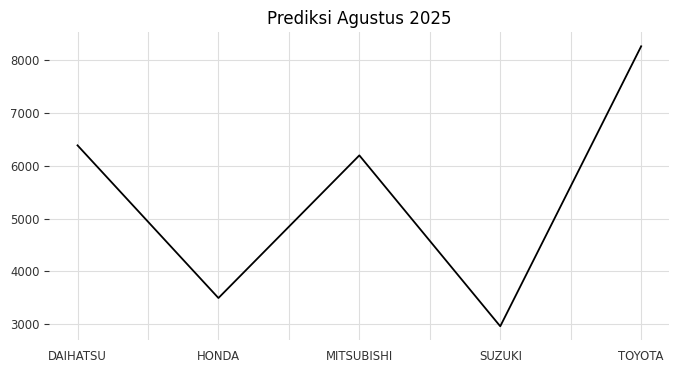

In [ ]:
from matplotlib import pyplot as plt
forecast_df['Prediksi Agustus 2025'].plot(kind='line', figsize=(8, 4), title='Prediksi Agustus 2025')
plt.gca().spines[['top', 'right']].set_visible(False)

# Kesimpulan

In [ ]:
print("\nHasil Prediksi Agustus 2025:")
forecast_df = pd.DataFrame.from_dict(forecast_results, orient='index', columns=['Prediksi Agustus 2025'])
print(forecast_df)


Hasil Prediksi Agustus 2025:
            Prediksi Agustus 2025
DAIHATSU                     6389
HONDA                        3494
MITSUBISHI                   6199
SUZUKI                       2958
TOYOTA                       8268


In [ ]:
forecast_df

,Prediksi Agustus 2025
DAIHATSU,6389
HONDA,3494
MITSUBISHI,6199
SUZUKI,2958
TOYOTA,8268


# Export Result to CSV

In [ ]:
# ubah hasil ke csv
forecast_df.to_csv('hasil_prediksi.csv')

In [ ]:
hasil = pd.read_csv('hasil_prediksi.csv')
hasil

,Unnamed: 0,Prediksi Agustus 2025
0,DAIHATSU,6389
1,HONDA,3494
2,MITSUBISHI,6199
3,SUZUKI,2958
4,TOYOTA,8268


# Unused

## Kode 1

In [ ]:
print("\nPrediksi Agustus 2025")
forecast_date = pd.to_datetime('2025-08-01')
full_df = df
forecast_results = {}

for brand in brand_cols:
    print(f"\nPrediksi untuk {brand}")
    full_series = full_df[brand]
    best_model_name = best_models[brand]['name']
    try:
        if 'AutoARIMA' in best_model_name:
            model = auto_arima(full_series, seasonal=True, m=12, trace=False, suppress_warnings=True)
            forecast = model.predict(n_periods=1)[0]
        elif 'SARIMA' in best_model_name or 'SARIMAX' in best_model_name:
            model = SARIMAX(full_series, order=(1,1,1), seasonal_order=(1,1,1,12))
            fit = model.fit(disp=False)
            forecast = fit.get_forecast(steps=1).predicted_mean[0]
        elif 'Prophet' in best_model_name:
            prophet_df = pd.DataFrame({'ds': full_series.index, 'y': full_series.values})
            model = Prophet(yearly_seasonality=True)
            model.fit(prophet_df)
            future = model.make_future_dataframe(periods=1, freq='MS')
            forecast_df = model.predict(future)
            forecast = forecast_df['yhat'].iloc[-1]
        elif 'HoltWinters' in best_model_name:
            model = ExponentialSmoothing(full_series, seasonal='add', seasonal_periods=12)
            fit = model.fit()
            forecast = fit.forecast(1)[0]
        elif 'Darts' in best_model_name:
            darts_series = TimeSeries.from_series(full_series)
            if 'AutoARIMA' in best_model_name:
                model = AutoARIMA()
            else:
                model = DartsExponentialSmoothing(seasonal_periods=12)
            model.fit(darts_series)
            pred = model.predict(1)
            forecast = pred.values().flatten()[0]
        else:
            forecast = np.nan
        forecast_results[brand] = round(forecast)
        print(f"Forecast {brand} Agustus 2025: {forecast_results[brand]}")
    except Exception as e:
        print(f"Gagal memprediksi untuk {brand}: {e}")


Prediksi Agustus 2025

Prediksi untuk DAIHATSU


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-1411884012.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = fit.get_forecast(steps=1).predicted_mean[0]
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s

Forecast DAIHATSU Agustus 2025: 6992

Prediksi untuk HONDA


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-1411884012.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = fit.get_forecast(steps=1).predicted_mean[0]
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecat

Forecast HONDA Agustus 2025: 3921

Prediksi untuk MITSUBISHI


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Forecast MITSUBISHI Agustus 2025: 6186

Prediksi untuk SUZUKI


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Forecast SUZUKI Agustus 2025: 2849

Prediksi untuk TOYOTA


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Forecast TOYOTA Agustus 2025: 8845


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/tmp/ipython-input-141188

In [ ]:
print("\nHasil Prediksi Agustus 2025:")
forecast_df = pd.DataFrame.from_dict(forecast_results, orient='index', columns=['Prediksi Agustus 2025'])
print(forecast_df)


Hasil Prediksi Agustus 2025:
            Prediksi Agustus 2025
DAIHATSU                     6992
HONDA                        3921
MITSUBISHI                   6186
SUZUKI                       2849
TOYOTA                       8845


In [ ]:
print("\nHasil Prediksi Agustus 2025:")
forecast_df = pd.DataFrame.from_dict(forecast_results, orient='index', columns=['Prediksi Agustus 2025'])
print(forecast_df)


Hasil Prediksi Agustus 2025:
            Prediksi Agustus 2025
DAIHATSU                     6389
HONDA                        3494
MITSUBISHI                   6199
SUZUKI                       2958
TOYOTA                       8268


## Kode 2

In [ ]:
print("Prediksi untuk Agustus 2025")


# PERBAIKAN: Memastikan 'data.index' adalah DatetimeIndex sebelum prediksi.
# Ini mencegah error jika indeks termodifikasi di langkah sebelumnya.

if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.date_range(start='2018-01-01', periods=len(data), freq='MS')

forecast_date = pd.to_datetime('2025-08-01')
full_df = data # Menggunakan seluruh dataset untuk melatih ulang model
forecast_results = {}

for brand in brand_cols:
    print(f"\nPrediksi untuk {brand} menggunakan model terbaik: {best_models[brand]['name']}")
    full_series = full_df[brand]
    best_model_name = best_models[brand]['name']

    # Hitung jumlah langkah yang diperlukan untuk prediksi
    last_date = full_series.index[-1]
    n_periods = (forecast_date.year - last_date.year) * 12 + (forecast_date.month - last_date.month)

    if n_periods <= 0:
        print(f"Tanggal prediksi {forecast_date.date()} tidak berada di masa depan.")
        continue

    try:
        # Melatih ulang model pada seluruh data dan membuat prediksi
        if 'SARIMAX' in best_model_name:
            order = best_orders[brand]['order']
            seasonal_order = best_orders[brand]['seasonal_order']
            model = SARIMAX(full_series, order=order, seasonal_order=seasonal_order)
            fit = model.fit(disp=False)
            forecast_series = fit.get_forecast(steps=n_periods).predicted_mean
            forecast = forecast_series.iloc[-1]

        elif 'Prophet' in best_model_name:
            prophet_df = pd.DataFrame({'ds': full_series.index, 'y': full_series.values})
            model = Prophet(yearly_seasonality=True)
            model.fit(prophet_df)
            future = model.make_future_dataframe(periods=n_periods, freq='MS')
            forecast_df = model.predict(future)
            forecast = forecast_df['yhat'].iloc[-1]

        elif 'HoltWinters' in best_model_name:
            model = ExponentialSmoothing(full_series, seasonal='add', seasonal_periods=12)
            fit = model.fit()
            forecast_series = fit.forecast(n_periods)
            forecast = forecast_series.iloc[-1]

        elif 'Darts' in best_model_name:
            darts_series = TimeSeries.from_series(full_series)
            if 'AutoARIMA' in best_model_name:
                model = AutoARIMA()
            else: # Darts_Holt
                model = DartsExponentialSmoothing(seasonal_periods=12)
            model.fit(darts_series)
            pred = model.predict(n_periods)
            forecast = pred.values().flatten()[-1]

        else:
            forecast = np.nan

        forecast_results[brand] = round(forecast)
        print(f"Prediksi penjualan {brand} pada Agustus 2025: {forecast_results[brand]} unit")

    except Exception as e:
        print(f"Gagal memprediksi untuk {brand}: {e}")

Prediksi untuk Agustus 2025

Prediksi untuk DAIHATSU menggunakan model terbaik: SARIMAX
Prediksi penjualan DAIHATSU pada Agustus 2025: 6389 unit

Prediksi untuk HONDA menggunakan model terbaik: SARIMAX
Prediksi penjualan HONDA pada Agustus 2025: 3494 unit

Prediksi untuk MITSUBISHI menggunakan model terbaik: Darts_AutoARIMA
Prediksi penjualan MITSUBISHI pada Agustus 2025: 6199 unit

Prediksi untuk SUZUKI menggunakan model terbaik: Darts_AutoARIMA
Prediksi penjualan SUZUKI pada Agustus 2025: 2958 unit

Prediksi untuk TOYOTA menggunakan model terbaik: Darts_AutoARIMA
Prediksi penjualan TOYOTA pada Agustus 2025: 8268 unit


In [ ]:
forecast_df

,Prediksi Agustus 2025
DAIHATSU,6389
HONDA,3494
MITSUBISHI,6199
SUZUKI,2958
TOYOTA,8268
